In [1]:
# Importing libraries
import numpy #linear algebra
import matplotlib.pyplot as plt #visualization library
import seaborn as sns #statistical data visualization
import pandas as pd #data processing, data I/O

%matplotlib inline

In [2]:
#importing dataset
df = pd.read_csv('car_evaluation.csv', header=None)
df.head(5)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.shape

(1728, 7)

In [4]:
#lets give columns name
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
#count the number of unique values
for col in col_names:
    print(df[col].value_counts())

med      432
high     432
vhigh    432
low      432
Name: buying, dtype: int64
med      432
high     432
vhigh    432
low      432
Name: maint, dtype: int64
5more    432
2        432
4        432
3        432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
med      576
big      576
small    576
Name: lug_boot, dtype: int64
med     576
high    576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


All the 7 variables of the dataset are of categorical type.

In [7]:
#checking missing values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

The data is clean, no need for data preprocessing.

# Feature Engineering

In [8]:
X = df.drop('class', axis=1)
y = df['class']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=123)

In [10]:
print(X_train.shape, X_test.shape)

(1157, 6) (571, 6)


As all the data in columns are ordinal data, we can perform Ordinal encoding to it to make it more efficient and increase predictive power

In [11]:
import category_encoders as ce

In [12]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [13]:
X_train.head(5)

,buying,maint,doors,persons,lug_boot,safety
585,1,1,1,1,1,1
1192,2,2,2,2,2,2
1422,3,1,2,1,1,1
1320,3,3,2,1,3,1
684,1,4,1,3,1,1


# Decision Tree (using gini index)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)

#fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [16]:
gini_pred = clf_gini.predict(X_test)

In [17]:
#checking accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy with gini index : {0:0.4}'.format(accuracy_score(y_test, gini_pred)))

Model accuracy with gini index : 0.8039


In [18]:
#checking for overfiting by comparing train and test accuracy score
gini_pred2 = clf_gini.predict(X_train)
print('Training set score : {0:0.4}'.format(accuracy_score(y_train, gini_pred2)))

gini_pred = clf_gini.predict(X_test)
print('Testing set score : {0:0.4}'.format(accuracy_score(y_test, gini_pred)))

Training set score : 0.7857
Testing set score : 0.8039


These two values are comparable, therefore no sign of overfiting.

## Visualizing Tree

[Text(251.10000000000002, 380.52, 'X[5] <= 1.5\ngini = 0.453\nsamples = 1157\nvalue = [253, 46, 815, 43]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 374\nvalue = [0, 0, 374, 0]'),
 Text(334.8, 271.8, 'X[3] <= 2.5\ngini = 0.572\nsamples = 783\nvalue = [253, 46, 441, 43]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.5\ngini = 0.48\nsamples = 520\nvalue = [123, 21, 353, 23]'),
 Text(83.7, 54.360000000000014, 'gini = 0.633\nsamples = 253\nvalue = [123, 21, 86, 23]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 267\nvalue = [0, 0, 267, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[0] <= 3.5\ngini = 0.629\nsamples = 263\nvalue = [130, 25, 88, 20]'),
 Text(418.5, 54.360000000000014, 'gini = 0.634\nsamples = 196\nvalue = [104, 25, 47, 20]'),
 Text(585.9, 54.360000000000014, 'gini = 0.475\nsamples = 67\nvalue = [26, 0, 41, 0]')]

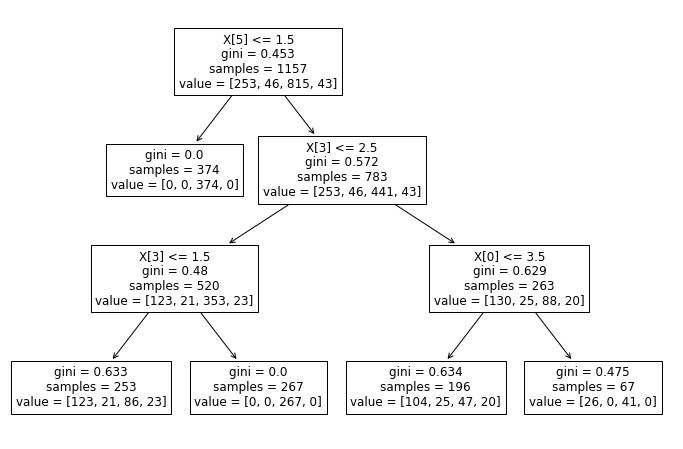

In [19]:
#using sklearn.tree package
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train,y_train))

# Decision Tree Classifier with Entropy criterion

In [21]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [25]:
y_pred_en = clf_en.predict(X_test)

In [29]:
print('Model accuracy with entropy criterion : {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy with entropy criterion : 0.8039


In [30]:
#checking for overfiting
print('Test set accuracy : {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

y_pred_en2 = clf_en.predict(X_train)
print('Training set accuracy : {0:0.4f}'.format(accuracy_score(y_train, y_pred_en2)))

Test set accuracy : 0.8039
Training set accuracy : 0.7857


Both the set accuracy score is comparable with each other. Therefore, no overfitting is present here.

[Text(251.10000000000002, 380.52, 'X[5] <= 1.5\nentropy = 1.197\nsamples = 1157\nvalue = [253, 46, 815, 43]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 374\nvalue = [0, 0, 374, 0]'),
 Text(334.8, 271.8, 'X[3] <= 2.5\nentropy = 1.463\nsamples = 783\nvalue = [253, 46, 441, 43]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.5\nentropy = 1.257\nsamples = 520\nvalue = [123, 21, 353, 23]'),
 Text(83.7, 54.360000000000014, 'entropy = 1.648\nsamples = 253\nvalue = [123, 21, 86, 23]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 267\nvalue = [0, 0, 267, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[0] <= 3.5\nentropy = 1.636\nsamples = 263\nvalue = [130, 25, 88, 20]'),
 Text(418.5, 54.360000000000014, 'entropy = 1.694\nsamples = 196\nvalue = [104, 25, 47, 20]'),
 Text(585.9, 54.360000000000014, 'entropy = 0.964\nsamples = 67\nvalue = [26, 0, 41, 0]')]

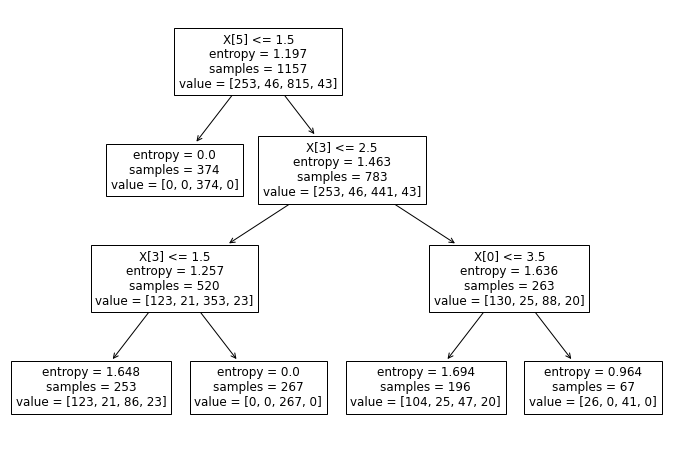

In [33]:
#Tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix with criterion entropy : \n\n',cm)

Confusion matrix with criterion entropy : 

 [[121   0  10   0]
 [ 23   0   0   0]
 [ 57   0 338   0]
 [ 22   0   0   0]]
